# LBA

To prepare the data, we carry out the initial cleanup via Google Sheets. To get all the prices in **USD** we added new columns and used the `GOOGLEFINANCE` formula to convert the moneies into a common currency. That allowed us to then normalize all the prices per *kg* or *per piece*.

We published the data as `.csv` files to allow us to directly use them with pandas without downloading.

Next we build a dictionary mapper that maps a country's name to an integer value. We used data representing the most expensive cities to live in 2021 as a guide in choosing integer values in an ascending order towards the most expensive countries (Most Expensive Countries To Live In 2021, n.d.). It is consistent with having integer values representing the perception of a store, the higher, the more luxurious. 

To calculate the average prices of the different products, we grouped containing the brands with it respective product, we then found the average of all of that while skipping over null values. Here are the means that we calculated for each product:

In [45]:
!cat data_means.txt

apples       4.215887
bananas      2.260635
tomatoes     5.324222
potatoes     2.666087
flour        2.692394
rice         4.404532
milk         1.777643
butter      12.203403
eggs         0.414965
chicken      9.406444
dtype: float64

The data does show us that there are correlations that exist within the data.

![](corr.png)

From heatmap we can see that the country correlates with the rent.

## References

1. Google Sheets - create and edit spreadsheets online, for free. (n.d.). Retrieved March 15, 2021, from [https://docs.google.com/spreadsheets/d/11tgVBErI4Z3p-thARU1p-qEWWDu70X0UlWhBt3lVZV4](https://docs.google.com/spreadsheets/d/11tgVBErI4Z3p-thARU1p-qEWWDu70X0UlWhBt3lVZV4)
2. Most Expensive Countries To Live In 2021. (n.d.). Retrieved March 15, 2021, from [https://worldpopulationreview.com/country-rankings/most-expensive-countries-to-live-in](https://worldpopulationreview.com/country-rankings/most-expensive-countries-to-live-in)


## Appendix

### Appendix 1 Setup

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pystan

In [20]:
data_url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQNXY6xTRRknm8q37iLmpo4wJzFiHrtwn_W1EwwywCBNS67KT1TusFWweRWaQKH-0l-KotykZ3wkeks/pub?gid=1459555462&single=true&output=csv'

In [3]:
country_mapping = {'Ukraine': 1, 'Bangladesh': 2, 'Kenya': 3, 'Brazil': 4, 'Canada': 5, 'Sweden': 6, 'USA': 7}
country_mapping_reversed = {value : key for (key, value) in country_mapping.items()}
country_mapper = lambda x: country_mapping[x]
perception_mapping = {'Budget (cheap)': 1, 'Mid-range': 2, 'Luxury (expensive)': 3}
perception_mapper = lambda x: perception_mapping[x]
perception_mapping_reversed = {value : key for (key, value) in perception_mapping.items()}

### Appendix 2 - Reading Data

In [4]:
df = pd.read_csv(
    data_url,
    usecols=[
        'country',
        'perception',
        'rent_normalized',
        'apples_1_price_normalized', 'apples_2_price_normalized', 'apples_3_price_normalized',
        'bananas_1_price_normalized', 'bananas_2_price_normalized', 'bananas_3_price_normalized',
        'tomatoes_1_price_normalized', 'tomatoes_2_price_normalized', 'tomatoes_3_price_normalized',
        'potatoes_1_price_normalized', 'potatoes_2_price_normalized', 'potatoes_3_price_normalized',
        'flour_1_price_normalized', 'flour_2_price_normalized', 'flour_3_price_normalized',
        'rice_1_price_normalized', 'rice_2_price_normalized', 'rice_3_price_normalized',
        'milk_1_price_normalized', 'milk_2_price_normalized', 'milk_3_price_normalized',
        'butter_1_price_normalized', 'butter_2_price_normalized', 'butter_3_price_normalized',
        'eggs_1_price_normalized', 'eggs_2_price_normalized', 'eggs_3_price_normalized',
        'chicken_1_price_normalized', 'chicken_2_price_normalized', 'chicken_3_price_normalized'
    ],
    na_values=0,  # Replace all 0's with NA values,
    converters={
        'country': country_mapper,
        'perception': perception_mapper
    },
    thousands=','  # The character used as the separator for thousands
)
df

,country,perception,rent_normalized,apples_1_price_normalized,apples_2_price_normalized,apples_3_price_normalized,bananas_1_price_normalized,bananas_2_price_normalized,bananas_3_price_normalized,tomatoes_1_price_normalized,...,milk_3_price_normalized,butter_1_price_normalized,butter_2_price_normalized,butter_3_price_normalized,eggs_1_price_normalized,eggs_2_price_normalized,eggs_3_price_normalized,chicken_1_price_normalized,chicken_2_price_normalized,chicken_3_price_normalized
0,5,1,1161.83,2.80,2.94,2.80,1.39,2.09,3.51,6.17,...,2.83,7.92,11.45,13.22,0.40,0.36,0.38,18.53,21.70,16.76
1,5,1,1241.95,5.29,3.53,7.05,1.36,1.60,5.29,5.29,...,1.06,7.75,10.04,13.57,0.36,0.50,0.51,6.16,9.70,19.41
2,7,2,2996.00,3.45,2.64,2.20,1.97,2.08,NaN,7.03,...,2.39,5.33,8.20,14.30,0.14,0.13,0.33,13.19,7.57,4.68
3,7,3,3360.00,5.48,6.59,8.79,1.08,3.28,4.38,4.38,...,5.25,9.98,18.64,19.96,0.72,0.50,0.48,10.99,13.19,15.40
4,7,1,4000.00,4.38,2.62,2.18,1.30,1.52,1.74,2.84,...,0.53,8.13,9.89,10.99,0.33,0.37,0.25,13.19,4.85,9.89
5,7,3,4000.00,9.00,4.76,NaN,4.13,NaN,NaN,4.17,...,5.42,39.60,16.23,26.39,0.50,0.46,NaN,47.00,NaN,NaN
6,6,1,810.92,3.41,3.53,2.35,2.94,3.18,3.30,3.77,...,1.02,9.18,9.18,11.07,0.35,0.29,0.34,12.73,16.42,11.45
7,6,2,810.92,2.35,3.41,3.41,3.41,NaN,NaN,3.77,...,NaN,9.42,9.89,11.77,0.23,0.26,0.28,17.57,13.08,18.25
8,1,1,144.73,1.03,0.87,0.90,1.03,1.09,1.21,1.81,...,0.83,7.96,8.49,8.83,0.12,0.10,0.14,3.98,4.19,4.02
9,1,2,361.82,1.27,1.25,1.08,1.34,1.23,1.23,2.20,...,2.03,11.58,12.60,16.70,0.16,0.14,0.14,4.70,4.34,4.54


In [6]:
products = {
    # Product name: list of product values
}

only_prices = df[
    df.columns[
        ~df.columns.isin(
            ['country','perception','rent_normalized']  # Excluded columns
        )
    ]
]

# Concatenate all the different brands of a given product
for col in only_prices:
    product_name = col.split('_')[0]
    product_values = products.get(product_name, [])
    product_values.extend(list(df[col]))
    products[product_name] = product_values

# Given we concatenated the values on top of each other
# we can concatenate the other values too
products['country'] = list(df['country'])*3
products['perception'] = list(df['perception'])*3
products['rent_normalized'] = list(df['rent_normalized'])*3
    
data = pd.DataFrame(products)
data

,apples,bananas,tomatoes,potatoes,flour,rice,milk,butter,eggs,chicken,country,perception,rent_normalized
0,2.80,1.39,6.17,3.53,2.40,6.51,2.60,7.92,0.40,18.53,5,1,1161.83
1,5.29,1.36,5.29,2.48,1.04,2.32,3.36,7.75,0.36,6.16,5,1,1241.95
2,3.45,1.97,7.03,1.14,1.63,5.79,1.16,5.33,0.14,13.19,7,2,2996.00
3,5.48,1.08,4.38,2.18,3.52,4.96,1.53,9.98,0.72,10.99,7,3,3360.00
4,4.38,1.30,2.84,0.66,2.19,4.95,0.92,8.13,0.33,13.19,7,1,4000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,2.50,1.66,NaN,1.30,0.88,1.65,1.85,7.76,0.17,7.76,7,1,2200.00
155,1.67,1.50,5.49,2.99,4.66,5.33,2.66,15.96,0.58,6.30,7,1,2695.00
156,4.66,1.66,4.99,1.99,0.96,3.09,2.55,6.62,0.17,7.99,7,2,2705.00
157,NaN,NaN,8.79,4.38,NaN,NaN,NaN,NaN,0.62,NaN,7,2,2750.00


In [44]:
means = data[
    data.columns[
        ~data.columns.isin(
            ['country','perception','rent_normalized']  # Excluded columns
        )
    ]
].mean(skipna=True)
with open('data_means.txt', 'w') as f:
    f.write(str(means))
means

apples       4.215887
bananas      2.260635
tomatoes     5.324222
potatoes     2.666087
flour        2.692394
rice         4.404532
milk         1.777643
butter      12.203403
eggs         0.414965
chicken      9.406444
dtype: float64

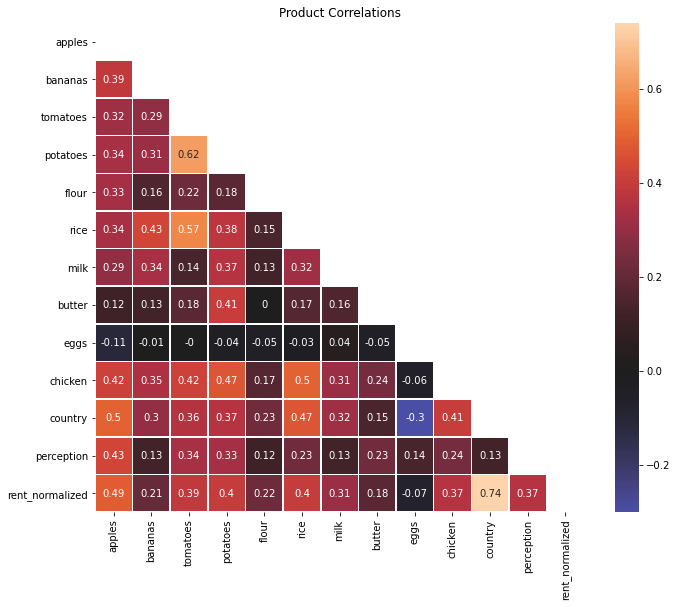

In [9]:
# Compute the correlation matrix
corr = data.corr().round(2)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot=True, center=0,
            square=True, linewidths=.5)
plt.title("Product Correlations")
plt.savefig('corr.png')
plt.show()

In [10]:
means_perception = data[
    data.columns[
        ~data.columns.isin(
            ['country','rent_normalized']  # Excluded columns
        )
    ]
].groupby('perception').mean()

means_perception.index = means_perception.index.map(lambda x: perception_mapping_reversed[x])
means_perception

,apples,bananas,tomatoes,potatoes,flour,rice,milk,butter,eggs,chicken
perception,,,,,,,,,,
Budget (cheap),3.135208,2.113556,4.003778,1.951277,2.005417,3.945217,1.825870,10.733696,0.309783,8.874783
Mid-range,4.284156,2.164179,5.248630,2.504054,2.919747,4.221429,1.542500,12.186500,0.459750,8.378400
Luxury (expensive),7.129375,3.195000,9.144118,5.347647,3.693333,6.606250,2.647222,16.034444,0.488824,16.660714


In [11]:
means_country = data[
    data.columns[
        ~data.columns.isin(
            ['perception','rent_normalized']  # Excluded columns
        )
    ]
].groupby('country').mean()

means_country.index = means_country.index.map(lambda x: country_mapping_reversed[x])
means_country

,apples,bananas,tomatoes,potatoes,flour,rice,milk,butter,eggs,chicken
country,,,,,,,,,,
Ukraine,0.952500,1.236667,2.657500,0.488333,0.759167,2.263333,1.164167,9.935833,1.289167,4.183333
Bangladesh,1.896000,0.548000,0.320000,0.258000,0.392000,0.855000,1.070000,11.400000,0.100000,3.161667
Kenya,3.326667,0.870000,0.690000,1.110000,0.566667,1.710000,0.840000,12.503333,0.143333,6.630000
Brazil,2.421429,1.030000,1.331667,1.062000,0.848182,1.104000,0.830000,10.252000,0.121000,2.656000
Canada,4.068333,2.540000,7.636667,2.830000,2.306667,6.003333,2.205000,10.658333,0.418333,15.376667
Sweden,3.076667,3.207500,5.230000,1.568333,1.353333,3.898000,1.288000,10.085000,0.291667,14.916667
USA,4.938529,2.556444,6.104141,3.225149,3.416768,5.239794,2.020306,12.892913,0.373700,10.528172


In [12]:
def get_relative_prices(df: pd.DataFrame, means: pd.Series = means) -> pd.DataFrame:
    """
    Finds the relative prices of products by comparing them with the mean 
    of the complete dataset.
    """
    new_df = df.copy()
    for col in new_df:
        new_df[col] = new_df[col] / means[col]
    return new_df

In [13]:
get_relative_prices(means_perception)

,apples,bananas,tomatoes,potatoes,flour,rice,milk,butter,eggs,chicken
perception,,,,,,,,,,
Budget (cheap),0.743665,0.934939,0.751993,0.731888,0.744845,0.895718,1.027130,0.879566,0.746527,0.943479
Mid-range,1.016193,0.957332,0.985802,0.939224,1.084442,0.958428,0.867722,0.998615,1.107925,0.890708
Luxury (expensive),1.691074,1.413320,1.717456,2.005804,1.371765,1.499875,1.489176,1.313932,1.177987,1.771202


In [14]:
get_relative_prices(means_country)

,apples,bananas,tomatoes,potatoes,flour,rice,milk,butter,eggs,chicken
country,,,,,,,,,,
Ukraine,0.225931,0.547044,0.499134,0.183165,0.281967,0.513865,0.654893,0.814185,3.106687,0.444731
Bangladesh,0.449727,0.242410,0.060103,0.096771,0.145595,0.194118,0.601921,0.934166,0.240984,0.336117
Kenya,0.789079,0.384848,0.129596,0.416341,0.210469,0.388236,0.472536,1.024578,0.345411,0.704836
Brazil,0.574358,0.455624,0.250115,0.398337,0.315029,0.250651,0.466910,0.840094,0.291591,0.282360
Canada,0.965001,1.123578,1.434325,1.061481,0.856734,1.362990,1.240407,0.873390,1.008117,1.634695
Sweden,0.729779,1.418849,0.982303,0.588253,0.502650,0.884997,0.724555,0.826409,0.702870,1.585792
USA,1.171409,1.130852,1.146485,1.209694,1.269044,1.189637,1.136508,1.056501,0.900558,1.119251


In [15]:
stan_code = '''
data {
    int<lower=0> N;
    int<lower=0> n_countries;
    int<lower=0> n_perceptions;
    int<lower=1>  countries[N];
    int<lower=1>  perceptions[N];
    real<lower=0>  prices[N];
}
parameters {
    real country_multiplier[n_countries];
    real perception_multiplier[n_perceptions];
    real<lower=0> base_price;
    real<lower=0> sigma;
}
model {
    // Priors
    country_multiplier ~ normal(1, 0.25);
    perception_multiplier ~ normal(1, 0.25);
    base_price ~ cauchy(1, 1);
    
    // Likelihood
    for (i in 1:N){
        prices[i] ~ normal(
            base_price * country_multiplier[countries[i]] * perception_multiplier[perceptions[i]], 
            sigma
        );
    }
}
'''

stan_model = pystan.StanModel(model_code=stan_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_53d07c34309491e171d7918768b8b685 NOW.


In [16]:
def get_product_posterior(product_name: str) -> str:
    """
    """
    cleaned_data = data.dropna() # Stan doesn't work with NA values
    # Results
    stan_data = {
        'N': len(cleaned_data),
        'n_countries': 7,
        'n_perceptions': 3,
        'countries': cleaned_data['country'],
        'perceptions': cleaned_data['perception'],
        'prices': cleaned_data[product_name],
    }
    return stan_model.sampling(data=stan_data)

In [17]:
get_product_posterior('rice')

Inference for Stan model: anon_model_53d07c34309491e171d7918768b8b685.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
country_multiplier[1]      0.77  3.0e-3   0.17   0.45   0.65   0.76   0.88   1.12   3308    1.0
country_multiplier[2]      0.72  3.5e-3   0.21   0.32   0.58   0.71   0.86   1.15   3570    1.0
country_multiplier[3]      0.95  3.7e-3   0.24   0.47   0.78   0.95   1.11   1.41   4068    1.0
country_multiplier[4]      0.69  3.5e-3    0.2   0.31   0.56   0.68   0.82    1.1   3352    1.0
country_multiplier[5]      1.32  3.2e-3   0.19   0.94   1.19   1.32   1.45   1.69   3677    1.0
country_multiplier[6]      1.05  3.2e-3    0.2   0.67   0.92   1.05   1.19   1.45   3781    1.0
country_multiplier[7]      1.33  3.3e-3   0.16   1.02   1.22   1.33   1.44   1.66   2517    1.0
perception_multiplier[1]    0.9  3.3e-3   0

In [18]:
get_product_posterior('eggs')

Inference for Stan model: anon_model_53d07c34309491e171d7918768b8b685.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
country_multiplier[1]       1.6  3.6e-3   0.19   1.23   1.46   1.59   1.72   1.98   2997    1.0
country_multiplier[2]      0.85  3.5e-3   0.24    0.4   0.69   0.86   1.01   1.33   4740    1.0
country_multiplier[3]      0.85  3.4e-3   0.23   0.41   0.68   0.85   1.01   1.29   4553    1.0
country_multiplier[4]      0.54  2.9e-3   0.19   0.19   0.41   0.53   0.66   0.93   4176    1.0
country_multiplier[5]       1.0  3.4e-3   0.22   0.56   0.85    1.0   1.15   1.43   4317    1.0
country_multiplier[6]      0.85  3.3e-3   0.22   0.42    0.7   0.85    1.0   1.28   4650    1.0
country_multiplier[7]      0.51  2.1e-3    0.1   0.33   0.44   0.51   0.58   0.74   2441    1.0
perception_multiplier[1]   0.54  3.3e-3   0

In [19]:
get_product_posterior('potatoes')

Inference for Stan model: anon_model_53d07c34309491e171d7918768b8b685.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
country_multiplier[1]      0.68  2.7e-3   0.21   0.29   0.54   0.68   0.82   1.09   6089    1.0
country_multiplier[2]      0.86  3.0e-3   0.24    0.4    0.7   0.86   1.02   1.33   6075    1.0
country_multiplier[3]      0.97  3.0e-3   0.25   0.48    0.8   0.97   1.13   1.44   6677    1.0
country_multiplier[4]      0.88  2.8e-3   0.23   0.45   0.73   0.88   1.03   1.33   6491    1.0
country_multiplier[5]      1.12  2.7e-3   0.22   0.69   0.97   1.13   1.27   1.56   6582    1.0
country_multiplier[6]      0.95  3.0e-3   0.23    0.5    0.8   0.95   1.11    1.4   6086    1.0
country_multiplier[7]      1.38  2.8e-3   0.18   1.04   1.25   1.37    1.5   1.76   4298    1.0
perception_multiplier[1]   0.79  2.8e-3   0

In [ ]:
distance_data_url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQNXY6xTRRknm8q37iLmpo4wJzFiHrtwn_W1EwwywCBNS67KT1TusFWweRWaQKH-0l-KotykZ3wkeks/pub?gid=914119430&single=true&output=csv'

In [32]:
distance_df = pd.read_csv(distance_data_url, index_col=0)
distance_df

,Ukraine,Bangladesh,Kenya,Brazil,Canada,Sweden,USA
Ukraine,0,5809,5403,10680,7769,1536,9015
Bangladesh,5809,0,6233,15915,10994,6730,13219
Kenya,5403,6233,0,9982,12992,6875,13713
Brazil,10680,15915,9982,0,9299,10336,7312
Canada,7769,10994,12992,9299,0,6236,2262
Sweden,1536,6730,6875,10336,6236,0,7687
USA,9015,13219,13713,7312,2262,7687,0


In [33]:
distance_df.columns = [country_mapper(x) for x in distance_df.columns]
distance_df.index = distance_df.index.map(country_mapper)
distance_df

,1,2,3,4,5,6,7
1,0,5809,5403,10680,7769,1536,9015
2,5809,0,6233,15915,10994,6730,13219
3,5403,6233,0,9982,12992,6875,13713
4,10680,15915,9982,0,9299,10336,7312
5,7769,10994,12992,9299,0,6236,2262
6,1536,6730,6875,10336,6236,0,7687
7,9015,13219,13713,7312,2262,7687,0



        
        
base_price  * corr * distance * country_multiplier[countries[i]] * perceptions_multiplier[perceptions[i]]

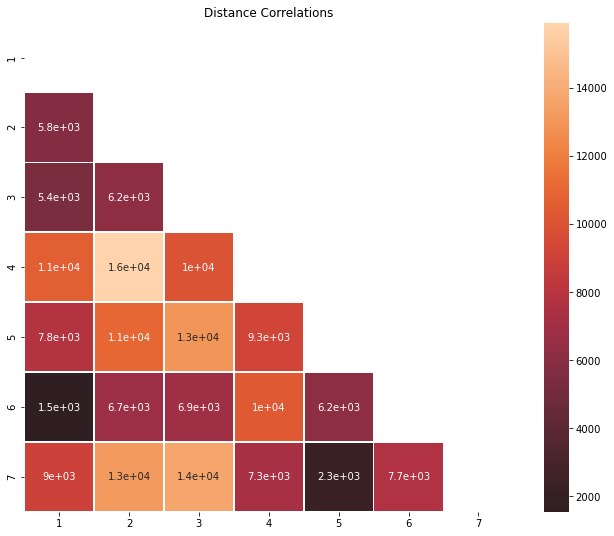

In [34]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(distance_df, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(distance_df, mask=mask, annot=True, center=0,
            square=True, linewidths=.5)
plt.title("Distance Correlations")
plt.show()

In [35]:
distance_df.corr()

,1,2,3,4,5,6,7
1,1.000000,0.646289,0.548936,-0.580283,-0.197251,0.931705,-0.397613
2,0.646289,1.000000,0.629088,-0.924967,-0.476268,0.475415,-0.712379
3,0.548936,0.629088,1.000000,-0.378867,-0.853040,0.282690,-0.909244
4,-0.580283,-0.924967,-0.378867,1.000000,0.141971,-0.495034,0.416308
5,-0.197251,-0.476268,-0.853040,0.141971,1.000000,0.097830,0.929736
6,0.931705,0.475415,0.282690,-0.495034,0.097830,1.000000,-0.114818
7,-0.397613,-0.712379,-0.909244,0.416308,0.929736,-0.114818,1.000000
